In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import yahoo_fin.stock_info as si #%pip install yahoo_fin
import plotly.graph_objs as go
import plotly.express as px

# Filtro de acciones en Python:
## La idea con este filtor inicla es relizar una depuración y selección de 5 acciones del SP500, esto nos permitira reducir el tamaño de los datos.

In [2]:
# Definición de los datos iniciales que requerimos en este caso el nombre y el ticker de las acciones que componene del índice
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = sp500['Symbol'].tolist()

#Definimos la fecha de inicio y fin para capturar los datos delas acciones en este los ultimos 5 años
start = "2018-01-01"
end = "2023-05-11"

#Descargamos la infoamción del índice SP500, para el rango de fechas definido
sp500_df = yf.download('^GSPC',start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000
...,...,...,...,...,...,...
2023-05-04,4082.550049,4082.610107,4048.280029,4061.219971,4061.219971,4920090000
2023-05-05,4084.729980,4147.020020,4084.729980,4136.250000,4136.250000,4186270000
2023-05-08,4136.979980,4142.299805,4123.810059,4138.120117,4138.120117,3641640000


In [21]:
df = sp500_df.copy().reset_index()
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.update_layout(
    title='Comprtamiento del indicie Indice SP500',
    yaxis_title='SP500 Index',
)


fig.show()

In [5]:
# Usando la información obtenida de los ultimos 5 años del índice, calculamos el porcente de variación diario
# y basado en estos datos obtenemo el retorno del ndice en los ultimos 5 años
sp500_df['Pct Change'] = sp500_df['Adj Close'].pct_change()
sp500_return = (sp500_df['Pct Change']+1).cumprod()[-1]
print(sp500_return)

1.5348411226260947


In [6]:
# Aquí debemos definir que fundamentales de seleccion vamos a utilizar
return_list =  []
final_df = pd.DataFrame(columns=['Tickers', 'Latest_Price', 'Score', 'PE_Ratio', 'PEG_Ratio'])

In [7]:
# En este punto nos descargaremos la información de las acciones pertenecientes al índice
# Luego calcularmes su el porcetaje de variación diario y el retorno de la acción en los ultimos 5 años
# Y relizaremos la comparación entre el retorno del índice general del sp500 y el retorno de cada acción
stocks_not_downloaded = []
for ticker in tickers:
    try:
        df = yf.download(ticker,start,end)
        df.to_csv(f'stock_data/{ticker}.csv')
        df['Pct Change'] = df['Adj Close'].pct_change()
        stock_return = (df['Pct Change']+1).cumprod()[-1]
        # Comparamos los retornos con el restorn del SP5000 global
        returns_compare = round((stock_return/sp500_return),2)
        return_list.append(returns_compare)
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print(f"{ex} for {ticker}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [26]:
# Zip tickers and return_list
zipped_data = zip(tickers, return_list)

# Print the zipped data
for ticker, ret in zipped_data:
    print(ticker, ret)

MMM 0.33
AOS 0.81
ABT 1.34
ABBV 1.25
ACN 1.23
ATVI 0.79
ADM 1.4
ADBE 1.26
ADP 1.35
AAP 0.83
AES 1.61
AFL 1.12
A 1.28
APD 1.25
AKAM 0.85
ALK 0.39
ALB 1.03
ARE 0.71
ALGN 0.89
ALLE 0.94
LNT 1.01
ALL 0.85
GOOGL 1.36
GOOG 1.37
MO 0.62
AMZN 1.21
AMCR 0.72
AMD 5.76
AEE 1.15
AAL 0.18
AEP 1.0
AXP 1.06
AIG 0.67
AMT 1.01
AWK 1.2
AMP 1.26
ABC 1.28
AME 1.34
AMGN 1.01
APH 1.18
ADI 1.45
ANSS 1.3
AON 1.74
APA 0.54
AAPL 2.77
AMAT 1.51
APTV 0.73
ACGL 1.71
ANET 1.59
AJG 2.49
AIZ 0.94
T 0.59
ATO 1.03
ADSK 1.19
AZO 2.42
AVB 0.79
AVY 1.06
AXON 4.73
BKR 0.66
BALL 1.0
BAC 0.67
BBWI 0.51
BAX 0.46
BDX 0.83
WRB 1.38
BRK.B 0.8
BBY 0.99
BIO 1.65
TECH 0.61
BIIB 0.92
BLK 0.58
BK 0.46
BA 0.97
BKNG 0.61
BWA 0.31
BXP 1.37
BSX 0.86
BMY 1.86
AVGO 1.21
BR 1.75
BRO 1.01
BF.B 0.83
BG 3.16
CHRW 0.92
CDNS 0.93
CZR 0.89
CPT 0.62
CPB 1.06
COF 0.74
CAH 0.11
KMX 2.44
CCL 0.52
CARR 1.01
CTLT 0.74
CAT 1.1
CBOE 1.67
CBRE 0.71
CDW 0.85
CE 0.84
CNC 1.22
CNP 1.17
CDAY 1.1
CF 0.64
CRL 0.63
SCHW 1.01
CHTR 4.57
CVX 1.02
CMG 1.36
CB 0.88
C

In [8]:
best_performers = pd.DataFrame(list(zip(tickers, return_list)), columns=['Tickers','Returns Compare' ])

In [9]:
best_performers.sort_values(by="Returns Compare", ascending= False)

,Tickers,Returns Compare
172,LLY,40.45
27,AMD,5.76
146,XRAY,5.51
443,TFX,5.14
421,SJM,5.05
...,...,...
29,AAL,0.18
345,NTRS,0.17
472,VRTX,0.16
89,CAH,0.11


In [10]:
# De esta forma tenemos una bases de datos que contiene la información de la acción y el resultado de la comparación (retorno_acción/retorno_SP500)
# Este valor lo usamdos para seleccionar las acciones que se encuntra en el percentil 80% es decir las de mejor desempeño frente al ndice global
#best_performers = pd.DataFrame(list(zip(tickers, return_list)), columns=['Tickers','Returns Compare' ])
# Revisión de varios ---- intervalos de selección (No dejemos que sea un número arbitrario) --- por qué -- Justificación
best_performers['Score'] = best_performers['Returns Compare'].rank(pct=True)*100
best_performers = best_performers[best_performers['Score'] >= best_performers['Score'].quantile(0.8)]
best_performers

,Tickers,Returns Compare,Score
10,AES,1.61,86.427146
27,AMD,5.76,99.800399
40,ADI,1.45,80.938124
42,AON,1.74,89.321357
44,AAPL,2.77,96.606786
...,...,...,...
470,VRSK,1.49,82.435130
485,WFC,2.42,94.710579
492,WMB,2.06,92.215569
497,XYL,1.71,88.722555


Para relizar la selección de los índices (acciones) finales usaremos los indicadores:
- P/E: Un P/E alto significa que el precio de la acción es relativamente alto en comparación a las ganancias y posiblemente esta esté sobrevalorada. Por el contrario, un P/E bajo indica que el actual precio de la acción es relativamente bajo en relación a las ganancias.
- PEG: Ratio Precio/Expectativas de Beneficio, más conocido como PEG (del anglosajón Price/Earnings To Growth literalmente "Precio/Beneficios a crecer") compara el precio de cotización de la acción, con respecto a los beneficios de la empresa (precio/beneficio) y a la expectativa de crecimiento a futuro de la misma.

De esta forma nos interesan las acciones con UN PE ente 10 y 30 y una PEG menor a 1.

In [11]:
for ticker in best_performers['Tickers']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv', index_col=0)
        latest_price = df['Adj Close'][-1]

        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
        peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
        score = round(best_performers[best_performers['Tickers'] == ticker]['Score'].tolist()[0], 2)

        condition_1 = 10 < pe_ratio < 30
        condition_2 = peg_ratio < 1

        if condition_1 and condition_2:
            new_data = {'Tickers': ticker,
                        'Latest_Price': latest_price,
                        'Score': score,
                        'PE_Ratio': pe_ratio,
                        'PEG_Ratio': peg_ratio}
            new_row = pd.DataFrame(new_data, index=[0])
            final_df = final_df.append(new_row, ignore_index=True)
    except Exception as e:
        print(f"{e} for {ticker}")

C:\Users\sjess\anaconda3\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sjess\anaconda3\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sjess\anaconda3\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sjess\anaconda3\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sjess\anaconda3\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

In [12]:
final_df.sort_values(by='Score', ascending=False)
pd.set_option('display.max_columns',10)
print(final_df)
final_df.to_csv('final.csv')

  Tickers  Latest_Price  Score  PE_Ratio  PEG_Ratio
0    CHTR    339.940002  98.40     10.89       0.34
1      CI    262.216705  92.42     12.09       0.95
2    FFIV    135.259995  97.80     27.05       0.93
3     TPR     37.139999  89.02     11.55       0.96
4     TGT    156.669098  81.44     22.37       0.75
5     WFC     38.279999  94.71     12.07       0.84


In [13]:
final_df['Tickers']

0    CHTR
1      CI
2    FFIV
3     TPR
4     TGT
5     WFC
Name: Tickers, dtype: object

In [14]:
final_Adj_Close_df = pd.DataFrame()
for ticker in final_df['Tickers']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv',index_col=0)
        final_Adj_Close_df['AC_'+str(ticker)] = df['Adj Close']

    except Exception as e:
        print(f"{e} for {ticker}")

final_Adj_Close_df

,AC_CHTR,AC_CI,AC_FFIV,AC_TPR,AC_TGT,AC_WFC
Date,,,,,,
2018-01-02,348.970001,193.862289,132.580002,39.192406,59.278305,52.136971
2018-01-03,353.029999,197.116287,134.039993,39.201069,58.875118,52.538086
2018-01-04,349.790009,198.149918,137.119995,39.140450,57.718124,53.195251
2018-01-05,350.880005,201.509186,136.179993,39.322300,58.331688,53.553684
2018-01-08,356.549988,199.279236,137.619995,39.218391,58.883888,52.947739
...,...,...,...,...,...,...
2023-05-04,348.779999,242.549194,131.130005,38.070000,151.504074,36.720001
2023-05-05,350.850006,259.519348,133.220001,38.970001,155.248718,37.939999
2023-05-08,350.500000,263.450867,135.039993,38.450001,155.447372,38.380001


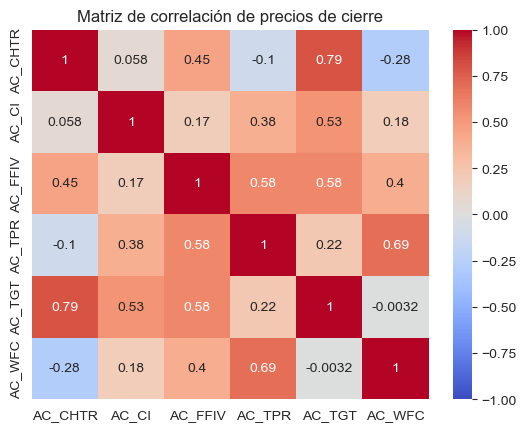

In [31]:
#MATRIZ DE CORRELACIÓN
# Calcular la matriz de correlación
matriz_correlacion = final_Adj_Close_df.corr()
# Graficar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de precios de cierre')
plt.show()

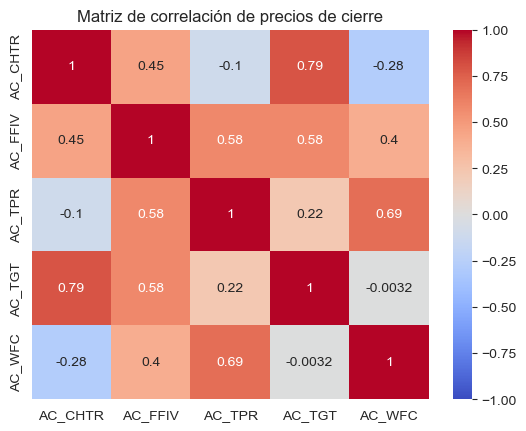

In [16]:
#LAS 5 MENOS CORRELACIONANDAS
matriz_correlacion = final_Adj_Close_df[['AC_CHTR', 'AC_FFIV', 'AC_TPR', 'AC_TGT', 'AC_WFC']].corr()
# Graficar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de precios de cierre')
plt.show()

# Validar la selección final si es la adecuada (correlación, disperción, etc.)

En ese orden de ideas nuestro portafolio final de acciones es:
Charter Communication ( 'CHTR') - tecnología
F5 Networks, inc ('FFIV')  - tecnología
Tapestry ('TPR') - Moda
Target Corporation ('TGT') - grandes almacenes Retail
Wells Fargo & Co. ('WFC') - Financiera

In [17]:
df= final_Adj_Close_df[['AC_CHTR', 'AC_FFIV', 'AC_TPR', 'AC_TGT', 'AC_WFC']].copy().reset_index()
df_cols = df.columns[1:]

In [18]:
# Creamos los graficos para cada una de las acciones y lo gueramos en la lista data
data = []
for ticker in df_cols:
    trace = go.Scatter(x=df['Date'], y=df[ticker], name=ticker)
    data.append(trace)

# Definimos los la forma del gráfico, cremos la figura y la mostramos en pantalla
layout = go.Layout(
    title='Stock Prices',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Closing Price')
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [32]:
final_data = final_Adj_Close_df[['AC_CHTR', 'AC_FFIV', 'AC_TPR', 'AC_TGT', 'AC_WFC']]
final_data

,AC_CHTR,AC_FFIV,AC_TPR,AC_TGT,AC_WFC
Date,,,,,
2018-01-02,348.970001,132.580002,39.192406,59.278305,52.136971
2018-01-03,353.029999,134.039993,39.201069,58.875118,52.538086
2018-01-04,349.790009,137.119995,39.140450,57.718124,53.195251
2018-01-05,350.880005,136.179993,39.322300,58.331688,53.553684
2018-01-08,356.549988,137.619995,39.218391,58.883888,52.947739
...,...,...,...,...,...
2023-05-04,348.779999,131.130005,38.070000,151.504074,36.720001
2023-05-05,350.850006,133.220001,38.970001,155.248718,37.939999
2023-05-08,350.500000,135.039993,38.450001,155.447372,38.380001


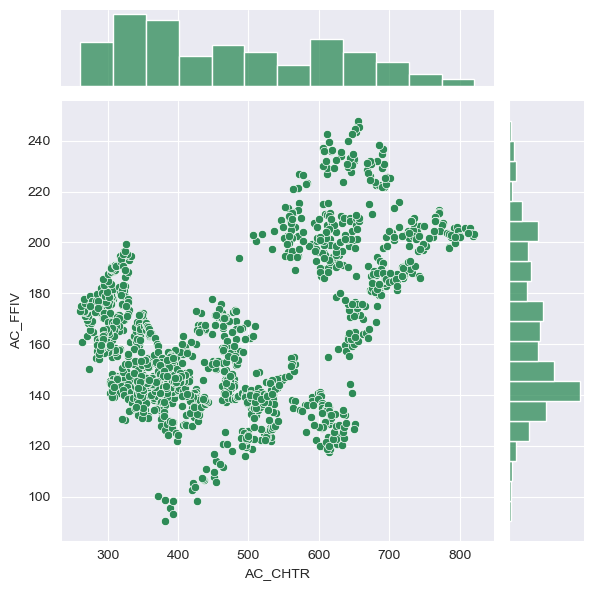

In [34]:
import seaborn as sns
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='AC_CHTR', y='AC_FFIV', data=final_data, kind='scatter', color='seagreen')

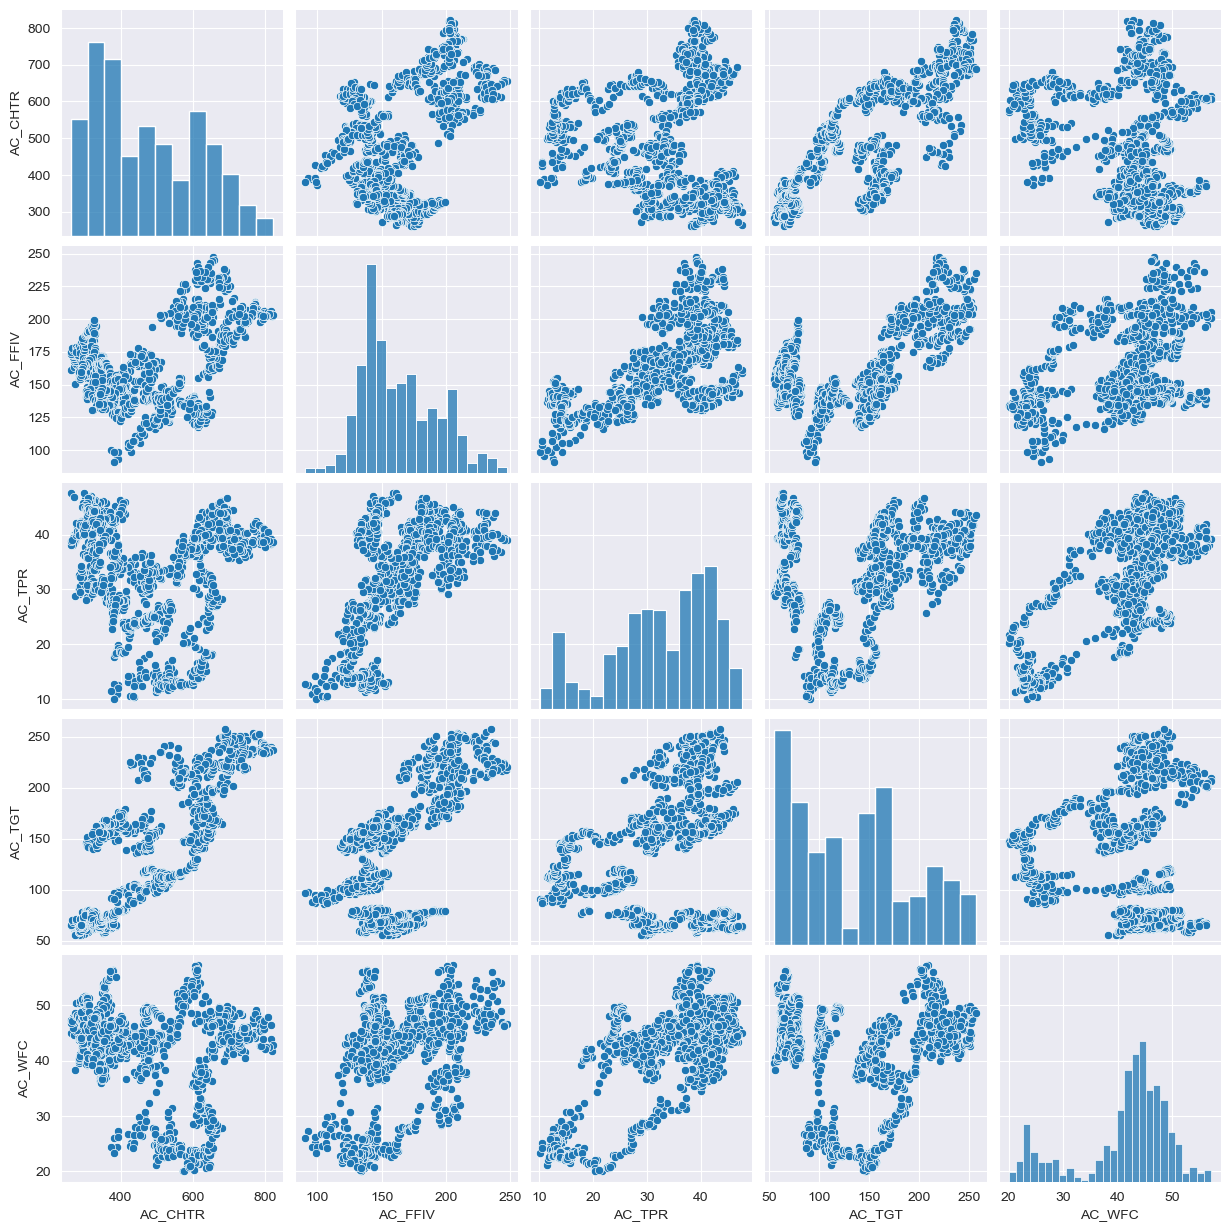

In [35]:
sns.pairplot(final_data)